In [149]:
#Import necessary libraries to load and analyze the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
#Read data from csv file
credit_data = pd.read_csv('creditcard.csv')

In [151]:
#Check data specifications
print(credit_data.shape)
print(credit_data.head(3))

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]


In [152]:
#31 columns: 1 Target Variable (Class), 30 Predictor Variables
#Check for missing values
credit_data.isnull().values.any()

False

In [153]:
#Separate target and predictor variables
target = credit_data.iloc[:,-1]
predictors = credit_data.iloc[:,0:30]

In [154]:
#Check summary statistics on the predictor variables
predictors.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [155]:
#Check for distribution of target variable
print(target.value_counts())

0    284315
1       492
Name: Class, dtype: int64


(array([2.84395e+05, 3.60000e+02, 3.60000e+01, 1.00000e+01, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,  2569.116,  5138.232,  7707.348, 10276.464, 12845.58 ,
        15414.696, 17983.812, 20552.928, 23122.044, 25691.16 ]),
 <a list of 10 Patch objects>)

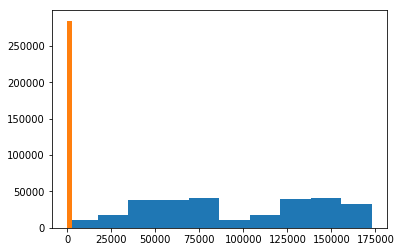

In [156]:
#Visualize two interpretable predictors Time and Amount
#predictors['Amount'] = np.log(predictors.Amount + 1) #Highly skewed; but log didn't change prediction results

plt.hist(predictors['Time'])
plt.hist(predictors['Amount'])

In [157]:
#Predictor variables v1..v28 are result of PCA and are in standard form
#Standardize predictor variables Time and Amount to prevent bias
from sklearn import preprocessing
predictors['Time'] = preprocessing.scale(predictors['Time'])
predictors['Amount'] = preprocessing.scale(predictors['Amount'])
predictors.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-1.050379e-14,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,3.202236e-16
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02


In [158]:
#Predictive Modeling on Unbalanced Data
#Split data into training and test data sets for predictive modeling
from sklearn.model_selection import train_test_split
p_train, p_test, t_train, t_test = train_test_split(predictors, target, test_size = 0.3, random_state = 101)

In [159]:
#Check statistics for train and test data sets
print(p_train.shape)
print(p_test.shape)

print(t_train.value_counts())
print(t_test.value_counts())

(199364, 30)
(85443, 30)
0    199016
1       348
Name: Class, dtype: int64
0    85299
1      144
Name: Class, dtype: int64


In [160]:
#Test different classification models on the data for accurate predictions: Logistic Regression and Random Forest
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1 = LogisticRegression()

#Train predictive model
model1.fit(p_train, t_train)

#Test predictive model
t_pred1 = model1.predict(p_test)

#Test accuracy of model
print(accuracy_score(t_test, t_pred1))

#99% accuracy doesn't say much because of the unbalanced target class
#Confusion matrix and roc curve depict better understanding of model

0.9992158515033414


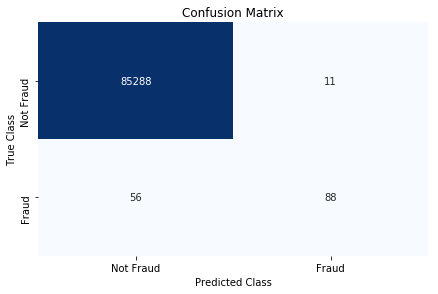

             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     85299
      Fraud       0.89      0.61      0.72       144

avg / total       1.00      1.00      1.00     85443



In [161]:
#Check classification matrix for the prediction results
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
names = ['Not Fraud', 'Fraud']
cm = confusion_matrix(t_test, t_pred1)

# Create pandas dataframe
dataframe = pd.DataFrame(cm, index=names, columns=names)
# Create heatmap
sn.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(classification_report(t_test, t_pred1, target_names = names))

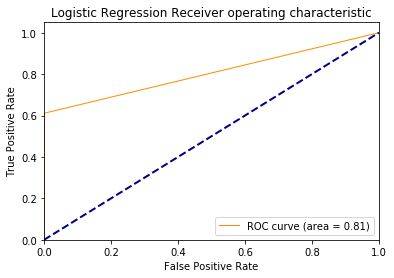

In [162]:
#Visualize fraud transaction prediction accuracy using ROC curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(t_test, t_pred1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [163]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()

#Train predictive model using training data set
model2.fit(p_train, t_train)

#Test predictive model using testing data set
t_pred2 = model2.predict(p_test)

#Test accuracy of model
print(accuracy_score(t_test, t_pred1))

0.9992158515033414


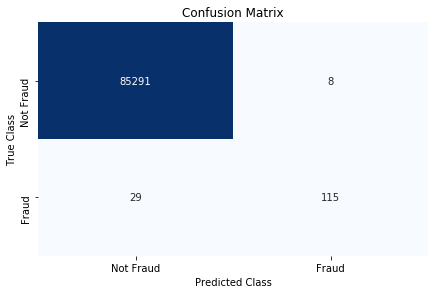

             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     85299
      Fraud       0.93      0.80      0.86       144

avg / total       1.00      1.00      1.00     85443



In [164]:
#Check classification matrix for the prediction results
cm2 = confusion_matrix(t_test, t_pred2)

# Create pandas dataframe
dataframe = pd.DataFrame(cm2, index=names, columns=names)
# Create heatmap
sn.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(classification_report(t_test, t_pred2, target_names = names))

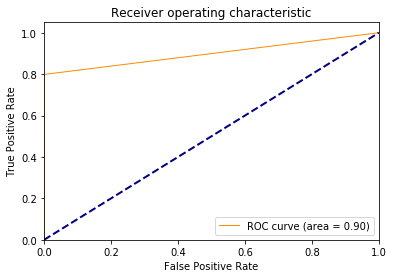

In [165]:
#Visualize fraud transaction prediction accuracy using ROC curve
fpr, tpr, thresholds = roc_curve(t_test, t_pred2)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Random Forest works well with unbalanced data, and produces better predictions

In [166]:
#Test effect of data balancing on prediction using Logistic Regression - Over sampling the minority class

train_data, test_data = train_test_split(credit_data, test_size = 0.3, random_state = 101)
print(train_data.shape)
print(test_data.shape)

(199364, 31)
(85443, 31)


In [167]:
#Separate majority and minority class for training data
train_majority = train_data[train_data.Class == 0]
train_minority = train_data[train_data.Class == 1]
print(train_majority.shape)
print(train_minority.shape)

(199016, 31)
(348, 31)


In [168]:
#Oversampling minority class
from sklearn.utils import resample
train_minority_upsampled = resample(train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=199016,    # to match majority class
                                 random_state=123)
print(train_minority_upsampled.shape)

(199016, 31)


In [169]:
#Combine the majority and upsampled minority class and run Logistic Regression
train_sample_data = pd.concat([train_majority, train_minority_upsampled])
print(train_sample_data.Class.value_counts()) #balanced data

1    199016
0    199016
Name: Class, dtype: int64


In [170]:
#Separate predictor and target variables
p2_train = train_sample_data.iloc[:,0:30]
t2_train = train_sample_data.iloc[:,-1]

p2_test = test_data.iloc[:,0:30]
t2_test = test_data.iloc[:,-1]
print(t2_test.value_counts())

0    85299
1      144
Name: Class, dtype: int64


In [171]:
#Run Logistic Regression model on balanced data
model3 = LogisticRegression()
model3.fit(p2_train, t2_train)

t_pred3 = model3.predict(p2_test)
print(accuracy_score(t2_test, t_pred3))

0.9764638413913369


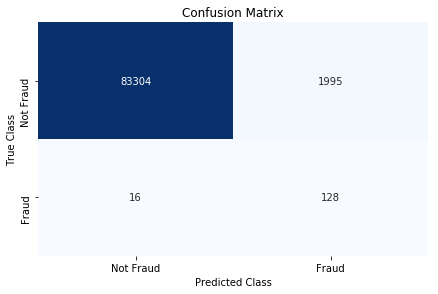

             precision    recall  f1-score   support

  Not Fraud       1.00      0.98      0.99     85299
      Fraud       0.06      0.89      0.11       144

avg / total       1.00      0.98      0.99     85443



In [172]:
#Check confusion matric for prediction results
cm3 = confusion_matrix(t2_test, t_pred3)

# Create pandas dataframe
dataframe = pd.DataFrame(cm3, index=names, columns=names)
# Create heatmap
sn.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(classification_report(t2_test, t3_pred, target_names = names))

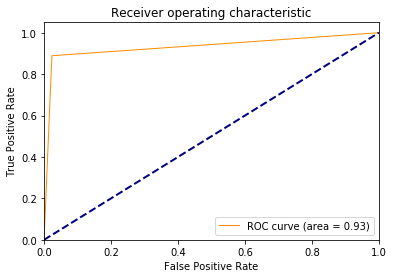

In [173]:
#Visualize fraud transaction prediction accuracy using ROC curve
fpr, tpr, thresholds = roc_curve(t2_test, t_pred3)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#The area under the curve is the highest for the balanced data
#Though the overall accuracy is least, the model is able to predict the minority class with more accuracy